## Observations and Insights
The results from this drug trial are promising, but should be interpreted carefully due to the small sample size.

1. Capomulin-treated mice had a much smaller average tumor size at the end of treatment (38.125164) than mice treated with Infubinol (60.165180) and Ceftamin (59.851956). The largest tumor for Capomulin-treated mice (47.685) was only slightly larger than the smallest tumor for Infubinol (45.0).
2. Ramicane performed comparably to Capomulin with regard to tumor size at the end of treatment, making it our strongest competitor.
3. Capomulin saw the smallest number of subject deaths during the course of the 45-day study (n=4) compared to the other most promising drugs studied (Ramicane, n=5; Infubinol, n=16; Ceftamin, n=12).
4. There is a strong positive correlation (r squared = 0.84) between mouse weight and average tumor size for mice treated with Capomulin.

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [ ]:
print("Mouse", mouse_metadata.columns, mouse_metadata.shape)
print("Results", study_results.columns, study_results.shape)

In [ ]:
study_results.head()

In [ ]:
mouse_metadata.tail()

In [2]:
# Combine the data into a single dataset
data = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

In [ ]:
# Have a look at the overall dataset
data.head()

## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
tumor_median = data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_mean = data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_var = data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_std = data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_sem = data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary = pd.DataFrame()
summary['Median Tumor Vol'] = tumor_median
summary['Mean Tumor Vol'] = tumor_mean
summary['Variance'] = tumor_var
summary['Standard Deviation'] = tumor_std
summary['Standard Error of the Mean'] = tumor_sem

summary

,Median Tumor Vol,Mean Tumor Vol,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,41.557809,40.675741,24.947764,4.994774,0.329346
Ceftamin,51.776157,52.591172,39.290177,6.268188,0.469821
Infubinol,51.820584,52.884795,43.128684,6.567243,0.492236
Ketapril,53.698743,55.235638,68.553577,8.279709,0.603860
Naftisol,52.509285,54.331565,66.173479,8.134708,0.596466
Placebo,52.288934,54.033581,61.168083,7.821003,0.581331
Propriva,50.854632,52.322552,42.351070,6.507770,0.512884
Ramicane,40.673236,40.216745,23.486704,4.846308,0.320955
Stelasyn,52.431737,54.233149,59.450562,7.710419,0.573111


## Bar plots: Number of data points for each drug regimen

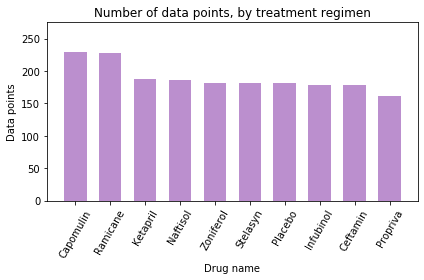

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regimen = pd.DataFrame(data['Drug Regimen'].value_counts())
regimen = regimen.rename(columns={"Drug Regimen": "Data points"})
regimen.plot.bar(y='Data points', width=0.65, color='#bb8fce')
plt.legend().set_visible(False)
plt.ylabel("Data points")
plt.xlabel("Drug name")
plt.title("Number of data points, by treatment regimen")
plt.xlim(-0.8,9.8)
plt.ylim(0,275)
plt.xticks(rotation=60)
plt.tight_layout()

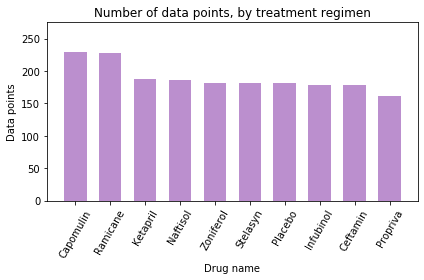

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(regimen.index, regimen['Data points'], width=0.65, color='#bb8fce')
plt.xticks(rotation=60)
plt.ylabel("Data points")
plt.xlabel("Drug name")
plt.title("Number of data points, by treatment regimen")
plt.xlim(-0.8,9.8)
plt.ylim(0,275)
plt.tight_layout()

## Pie plots: Distribution of mouse sex

Text(0.5, 1.0, 'Distribution of subjects by gender')

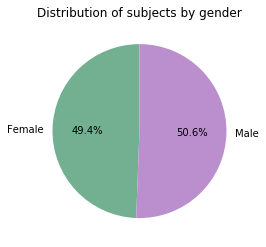

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_genders = data.groupby('Sex')['Mouse ID'].count()
ax = mice_genders.plot.pie(autopct="%1.1f%%", startangle=90, colors=['#73b092', '#bb8fce'])
ax.set_ylabel('') # Y label removal solution borrowed from https://stackoverflow.com/questions/34094596/python-matplotlib-pyplot-pie-charts-how-to-remove-the-label-on-the-left-side
plt.title("Distribution of subjects by gender")

Text(0.5, 1.0, 'Distribution of subjects by gender')

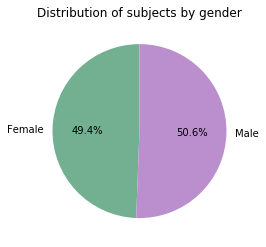

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_genders, labels=mice_genders.index, autopct="%1.1f%%", startangle=90, colors=['#73b092', '#bb8fce'])
plt.title("Distribution of subjects by gender")

## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin.

# Create a df of the most promising drug regimens
promising = data[(data['Drug Regimen'] == 'Capomulin') | (data['Drug Regimen'] == 'Ramicane') | \
                 (data['Drug Regimen'] == 'Infubinol') | (data['Drug Regimen'] == 'Ceftamin')]

# Get the final timepoints for each mouse
promising_timepoints = promising.groupby(['Drug Regimen', 'Mouse ID'])['Timepoint'].max()
promising_timepoints_df = pd.DataFrame(promising_timepoints)

# Merge df with the max timepoints for each mouse with the original dataframe for the four promising drugs, to get the final tumor volume at those timepoints
max_times = promising.merge(promising_timepoints_df, on=['Drug Regimen', 'Mouse ID', 'Timepoint'], how='inner')
# max_times.head(5)

In [9]:
cap_deaths = max_times[(max_times['Drug Regimen'] == 'Capomulin') & (max_times['Timepoint'] < 45)]
print("Capomulin deaths: ", cap_deaths.shape[0])
ram_deaths = max_times[(max_times['Drug Regimen'] == 'Ramicane') & (max_times['Timepoint'] < 45)]
print("Ramicane deaths: ", ram_deaths.shape[0])
Infubinol_deaths = max_times[(max_times['Drug Regimen'] == 'Infubinol') & (max_times['Timepoint'] < 45)]
print("Infubinol deaths: ", Infubinol_deaths.shape[0])
Ceftamin_deaths = max_times[(max_times['Drug Regimen'] == 'Ceftamin') & (max_times['Timepoint'] < 45)]
print("Ceftamin deaths: ", Ceftamin_deaths.shape[0])

Capomulin deaths:  4
Ramicane deaths:  5
Infubinol deaths:  16
Ceftamin deaths:  12


### Ramicane quartiles & outliers

In [10]:
quartile_df = pd.DataFrame()

Ramicane_df = max_times[(max_times['Drug Regimen'] == 'Ramicane')]
quartiles = Ramicane_df['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])

lowerq = quartiles[0.25]
upperq = quartiles[0.75] 
iqr = upperq-lowerq 

print(f"Ramicane Final Tumor size, lower quartile: {lowerq}")
print(f"Ramicane Final Tumor size, upper quartile: {upperq}")
print(f"Ramicane Interquartile range: {iqr}")
print(f"Ramicane Final Tumor size, median: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

quartile_df['Ramicane'] = quartiles

outliers = Ramicane_df[(Ramicane_df['Tumor Volume (mm3)'] < lower_bound) | (Ramicane_df['Tumor Volume (mm3)'] > upper_bound)]
print(f"There are {len(outliers)} outliers in the Ramicane dataset.")

# Ramicane_df

Ramicane Final Tumor size, lower quartile: 31.56046955
Ramicane Final Tumor size, upper quartile: 40.65900627
Ramicane Interquartile range: 9.098536719999998
Ramicane Final Tumor size, median: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
There are 0 outliers in the Ramicane dataset.


### Capomulin quartiles & outliers

In [11]:
Capomulin_df = max_times[(max_times['Drug Regimen'] == 'Capomulin')]
quartiles = Capomulin_df['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])

lowerq = quartiles[0.25]
upperq = quartiles[0.75] 
iqr = upperq-lowerq

print(f"Capomulin Final Tumor size, lower quartile: {lowerq}")
print(f"Capomulin Final Tumor size, upper quartile: {upperq}")
print(f"Capomulin Interquartile range: {iqr}")
print(f"Capomulin Final Tumor size, median: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outliers = Capomulin_df[(Capomulin_df['Tumor Volume (mm3)'] < lower_bound) | (Capomulin_df['Tumor Volume (mm3)'] > upper_bound)]
print(f"There are {len(outliers)} outliers in the Capomulin dataset.")

quartile_df['Capomulin'] = quartiles

# Capomulin_df

Capomulin Final Tumor size, lower quartile: 32.37735684
Capomulin Final Tumor size, upper quartile: 40.1592203
Capomulin Interquartile range: 7.781863460000004
Capomulin Final Tumor size, median: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
There are 0 outliers in the Capomulin dataset.


### Infubinol quartiles & outliers

In [12]:
Infubinol_df = max_times[(max_times['Drug Regimen'] == 'Infubinol')]
quartiles = Infubinol_df['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])

lowerq = quartiles[0.25]
upperq = quartiles[0.75] 
iqr = upperq-lowerq 

print(f"Infubinol Final Tumor size, lower quartile: {lowerq}")
print(f"Infubinol Final Tumor size, upper quartile: {upperq}")
print(f"Infubinol Interquartile range: {iqr}")
print(f"Infubinol Final Tumor size, median: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outliers = Infubinol_df[(Infubinol_df['Tumor Volume (mm3)'] < lower_bound) | (Infubinol_df['Tumor Volume (mm3)'] > upper_bound)]
print(f"There are {len(outliers)} outliers in the Infubinol dataset.")

quartile_df['Infubinol'] = quartiles

# Infubinol_df

Infubinol Final Tumor size, lower quartile: 54.04860769
Infubinol Final Tumor size, upper quartile: 65.52574285
Infubinol Interquartile range: 11.477135160000003
Infubinol Final Tumor size, median: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
There are 1 outliers in the Infubinol dataset.


### Ceftamin quartiles & outliers

In [13]:
Ceftamin_df = max_times[(max_times['Drug Regimen'] == 'Ceftamin')]
quartiles = Ceftamin_df['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])

# Infubinol_df = max_times[(max_times['Drug Regimen'] == 'Infubinol')]
# quartiles = Infubinol_df['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])

lowerq = quartiles[0.25]
upperq = quartiles[0.75] 
iqr = upperq-lowerq 

print(f"Ceftamin Final Tumor size, lower quartile: {lowerq}")
print(f"Ceftamin Final Tumor size, upper quartile: {upperq}")
print(f"Ceftamin Interquartile range: {iqr}")
print(f"Ceftamin Final Tumor size, median: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outliers = Ceftamin_df[(Ceftamin_df['Tumor Volume (mm3)'] < lower_bound) | (Ceftamin_df['Tumor Volume (mm3)'] > upper_bound)]
print(f"There are {len(outliers)} outliers in the Ceftamin dataset.")

quartile_df['Ceftamin'] = quartiles

# Ceftamin_df

Ceftamin Final Tumor size, lower quartile: 48.72207785
Ceftamin Final Tumor size, upper quartile: 64.29983003
Ceftamin Interquartile range: 15.577752179999997
Ceftamin Final Tumor size, median: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
There are 0 outliers in the Ceftamin dataset.


### Comparing quartiles for all four drug regimens

In [ ]:
quartile_df

### Maximum and mininum final tumor sizes for the four regimens

In [ ]:
maxes = max_times.groupby('Drug Regimen')['Tumor Volume (mm3)'].max()
mins = max_times.groupby('Drug Regimen')['Tumor Volume (mm3)'].min()
print(maxes, mins)

### Plotting the quartiles and outliers for each drug regimen

Text(0.5, 1.0, 'Tumor volumes at end of treatment')

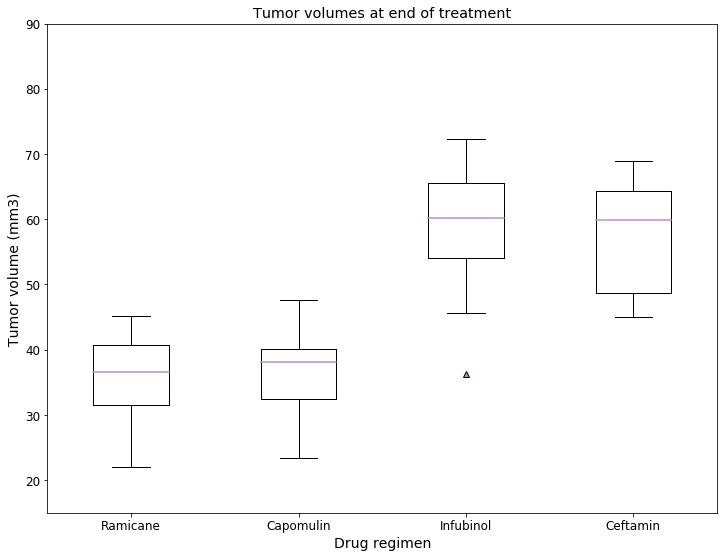

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Create list of data to plot
plot_data = [Ramicane_df['Tumor Volume (mm3)'],
                Capomulin_df['Tumor Volume (mm3)'],
                Infubinol_df['Tumor Volume (mm3)'],   
                Ceftamin_df['Tumor Volume (mm3)']]

markers = dict(markerfacecolor='#bb8fce', marker='^')
medianprops = dict(linestyle='-', linewidth=1.5, color='#bb8fce')
                
# Create a figure instance
fig = plt.figure(figsize=(12,9))

# Create an axes instance
ax = fig.add_subplot()

# Create the boxplot
drug_compare = ax.boxplot(plot_data, flierprops=markers, medianprops=medianprops)
plt.ylim(15,90)
plt.yticks(fontsize='12')
plt.xticks(range(1,5), labels=quartile_df.columns, fontsize='12')
plt.ylabel("Tumor volume (mm3)", fontsize='14')
plt.xlabel("Drug regimen", fontsize='14')
plt.title("Tumor volumes at end of treatment", fontsize='x-large')

## Line and scatter plots

### Tumor volume over time for Mouse x401

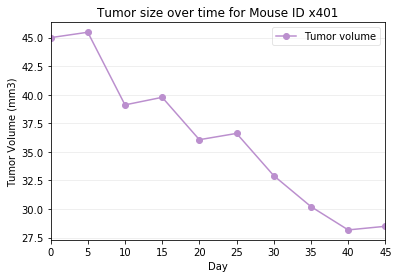

In [15]:
# Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin.
Capomulin_mouse = data[(data['Drug Regimen'] == 'Capomulin') & (data['Mouse ID'] == 'x401')]
plt.plot(Capomulin_mouse['Timepoint'], Capomulin_mouse['Tumor Volume (mm3)'], label="Tumor volume", color='#bb8fce', marker='o')
plt.xlabel('Day')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor size over time for Mouse ID x401')
plt.xlim(0,45)
plt.legend(framealpha=0.5, loc='best')
plt.grid(b=None, which='major', axis='y', alpha=0.25)

### Plotting mouse weight vs average tumor volume

(30, 50)

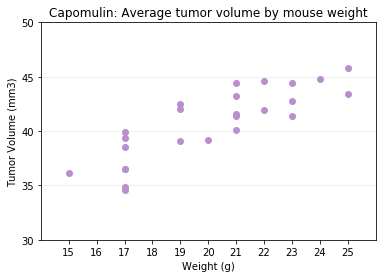

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.
Capomulin = data[data['Drug Regimen'] == 'Capomulin']
avg = Capomulin.groupby('Mouse ID')['Tumor Volume (mm3)', 'Weight (g)'].mean()
weights = avg['Weight (g)']
tumor_vol = avg['Tumor Volume (mm3)']
plt.scatter(weights, tumor_vol, color='#bb8fce', marker='o') 
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.title("Capomulin: Average tumor volume by mouse weight")
plt.xticks(range(15,26))
plt.yticks(np.arange(20, 52, step=5))
plt.grid(b=None, which='major', axis='y', alpha=0.25)
plt.xlim(14,26)
plt.ylim(30,50)

### Capomulin: Correlation coefficient & linear regression model

In [17]:
# Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume 
# for the Capomulin treatment. 

# Correlation coefficient
correlation = st.pearsonr(weights, tumor_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(weights, tumor_vol) 
regress_values = weights * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 

The correlation between both factors is 0.84


(30, 50)

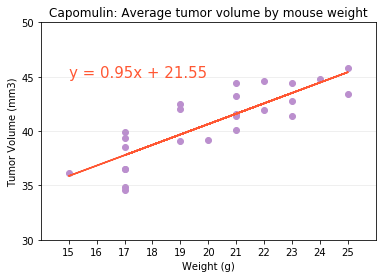

In [18]:
Capomulin = data[data['Drug Regimen'] == 'Capomulin']
avg = Capomulin.groupby('Mouse ID')['Tumor Volume (mm3)', 'Weight (g)'].mean()
weights = avg['Weight (g)']
tumor_vol = avg['Tumor Volume (mm3)']
plt.plot(weights,regress_values,"-", color='#FF5733')
plt.annotate(line_eq,(15,45),fontsize=15,color="#FF5733") 
plt.scatter(weights, tumor_vol, color='#bb8fce', marker='o') 
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.title("Capomulin: Average tumor volume by mouse weight")
plt.xticks(range(15,26))
plt.yticks(np.arange(20, 52, step=5))
plt.grid(b=None, which='major', axis='y', alpha=0.25)
plt.xlim(14,26)
plt.ylim(30,50)